In [1]:
import numpy as np
import pickle
import gzip

In [2]:
def read_mnist(mnist_file):
    """
    Reads MNIST data.
    
    Parameters
    ----------
    mnist_file : string
        The name of the MNIST file (e.g., 'mnist.pkl.gz').
    
    Returns
    -------
    (train_X, train_Y, val_X, val_Y, test_X, test_Y) : tuple
        train_X : numpy array, shape (N=50000, d=784)
            Input vectors of the training set.
        train_Y: numpy array, shape (N=50000)
            Outputs of the training set.
        val_X : numpy array, shape (N=10000, d=784)
            Input vectors of the validation set.
        val_Y: numpy array, shape (N=10000)
            Outputs of the validation set.
        test_X : numpy array, shape (N=10000, d=784)
            Input vectors of the test set.
        test_Y: numpy array, shape (N=10000)
            Outputs of the test set.
    """
    f = gzip.open(mnist_file, 'rb')
    train_data, val_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    
    train_X, train_Y = train_data
    val_X, val_Y = val_data
    test_X, test_Y = test_data    
    
    return train_X, train_Y, val_X, val_Y, test_X, test_Y

In [3]:
# Test
train_X, train_Y, val_X, val_Y, test_X, test_Y = read_mnist('mnist.pkl.gz')

print('train_X.shape =', train_X.shape)
print('train_Y.shape =', train_Y.shape)
print('val_X.shape   =', val_X.shape)
print('val_Y.shape   =', val_Y.shape)
print('test_X.shape  =', test_X.shape)
print('test_Y.shape  =', test_Y.shape)

print('\ntrain_X: min = %.3f, max = %.3f' %(train_X.min(), train_X.max()))
print('train_Y: min = %d, max = %d' %(train_Y.min(), train_Y.max()))

train_X.shape = (50000, 784)
train_Y.shape = (50000,)
val_X.shape   = (10000, 784)
val_Y.shape   = (10000,)
test_X.shape  = (10000, 784)
test_Y.shape  = (10000,)

train_X: min = 0.000, max = 0.996
train_Y: min = 0, max = 9


**Linear Kernel**

In [4]:
from sklearn.svm import SVC

In [5]:
def SVC_LinearKernel(train_X, train_Y, val_X, val_Y, c):
    """
    Input:
        train_X, train_Y: tập dữ liệu training
        val_X, val_Y: tập dữ liệu validation
        c: siêu tham số C
    Output:
        err_train: độ lỗi tập training ứng với siêu tham số c
        err_val: độ lỗi tập validation ứng với siêu tham số c
    """
    classify = SVC(kernel = 'linear', C = c)
    %time classify.fit(train_X, train_Y)
    train_score = classify.score(train_X, train_Y)
    val_score = classify.score(val_X, val_Y)
    err_train = 1 - train_score
    err_val = 1 - val_score
    print("Training score: ",train_score)
    print("Validation score: ",val_score)
    return err_train, err_val

In [6]:
def SVM_LinearKernel(C):
    """
    Input:
        C: tập siêu tham số C
    Output:
        lserr_train: danh sách độ lỗi trên tập training với c tương ứng
        lserr_val: danh sách độ lỗi trên tập validaiton với c tương ứng
    """
    lserr_train = []
    lserr_val = []
    err_train = 0
    err_val = 0
    for c in C:
        print("C= ",c)
        err_train, err_val = SVC_LinearKernel(train_X, train_Y, val_X, val_Y, c)
        print("Training Error: ", err_train)
        print("Validation Error: ", err_val)
        lserr_train.append(err_train)
        lserr_val.append(err_val)
    return lserr_train,lserr_val

In [7]:
C = [0.01, 0.05, 0.1, 0.11, 0.12, 0.2, 0.5, 0.8, 0.9, 1, 10, 100, 1000]
list_ET1 = []
list_EV1 = []
list_ET1, listEV1 = SVM_LinearKernel(C)

C=  0.01
Wall time: 8min 8s
Training score:  0.94406
Validation score:  0.9437
Training Error:  0.05593999999999999
Validation Error:  0.05630000000000002
C=  0.05
Wall time: 5min 59s
Training score:  0.95424
Validation score:  0.948
Training Error:  0.04576000000000002
Validation Error:  0.052000000000000046
C=  0.1
Wall time: 4min 59s
Training score:  0.95812
Validation score:  0.9481
Training Error:  0.04188000000000003
Validation Error:  0.051899999999999946
C=  0.11
Wall time: 4min 35s
Training score:  0.95866
Validation score:  0.9477
Training Error:  0.04134000000000004
Validation Error:  0.05230000000000001
C=  0.12
Wall time: 4min 35s
Training score:  0.95918
Validation score:  0.9472
Training Error:  0.04081999999999997
Validation Error:  0.05279999999999996
C=  0.2
Wall time: 4min 42s
Training score:  0.96248
Validation score:  0.9463
Training Error:  0.03752
Validation Error:  0.05369999999999997
C=  0.5
Wall time: 4min 54s
Training score:  0.96854
Validation score:  0.9445

**RBF Kernel**

In [8]:
def SVC_RBFKernel(train_X, train_Y, val_X, val_Y, c = 1, gamma = 0.001, max_iter = -1):
    """
    Input:
        train_X, train_Y: tập dữ liệu training
        val_X, val_Y: tập dữ liệu validation
        c: siêu tham số C
        gamma: siêu tham số gamma 
        max_iter: giới hạn số vòng lặp
    Output:
        err_train: độ lỗi tập training ứng với siêu tham số c
        err_val: độ lỗi tập validation ứng với siêu tham số c
    """
    classify = SVC(kernel = 'rbf', C = c, gamma = gamma, max_iter = max_iter)
    %time classify.fit(train_X, train_Y)
    train_score = classify.score(train_X, train_Y)
    val_score = classify.score(val_X, val_Y)
    err_train = 1 - train_score
    err_val = 1 - val_score
    print("Training score: ",train_score)
    print("Validation score: ",val_score)
    return err_train, err_val

In [9]:
def SVM_RBFKernel(C, Gamma, max_iter = -1):
    """
    Input:
        C: tập siêu tham số C
        Gamma: tập siêu tham số gamma
        max_iter: giới hạn số vòng lặp
    Output:
        lserr_train: danh sách độ lỗi trên tập training ứng với c và gamma tương ứng.
        lserr_val: danh sách độ lỗi trên tập validation ứng với c và gamma tương ứng.
    """
    lserr_train = []
    lserr_val = []
    err_train = 0
    err_val = 0
    for c in C:
        for g in Gamma:
            print("C= ",c,"gamma = ",g)
            err_train, err_val = SVC_RBFKernel(train_X, train_Y, val_X, val_Y, c, g, max_iter)
            print("Training Error: ", err_train)
            print("Validation Error: ", err_val)
            lserr_train.append(err_train)
            lserr_val.append(err_val)
    return lserr_train,lserr_val

In [10]:
C = [0.1, 1, 10]
Gamma = [0.001, 0.01, 0.1]
list_ET2 = []
list_EV2 = []
list_ET2, list_EV2 = SVM_RBFKernel(C, Gamma, max_iter = -1)

C=  0.1 gamma =  0.001
Wall time: 26min 5s
Training score:  0.90176
Validation score:  0.9139
Training Error:  0.09824
Validation Error:  0.08609999999999995
C=  0.1 gamma =  0.01
Wall time: 12min 19s
Training score:  0.95298
Validation score:  0.9578
Training Error:  0.04701999999999995
Validation Error:  0.042200000000000015
C=  0.1 gamma =  0.1
Wall time: 1h 10min 35s
Training score:  0.71048
Validation score:  0.6875
Training Error:  0.28952
Validation Error:  0.3125
C=  1 gamma =  0.001
Wall time: 10min 5s
Training score:  0.93578
Validation score:  0.9411
Training Error:  0.06422000000000005
Validation Error:  0.05889999999999995
C=  1 gamma =  0.01
Wall time: 6min 9s
Training score:  0.98474
Validation score:  0.9777
Training Error:  0.015260000000000051
Validation Error:  0.022299999999999986
C=  1 gamma =  0.1
Wall time: 2h 4min 42s
Training score:  0.99996
Validation score:  0.9552
Training Error:  4.0000000000040004e-05
Validation Error:  0.04479999999999995
C=  10 gamma =  

In [11]:
C = [2, 3, 4, 5, 6, 7, 8, 9]
Gamma = [0.01]
list_ET3 = []
list_EV3 = []
list_ET3, list_EV3 = SVM_RBFKernel(C, Gamma, max_iter = -1)

C=  2 gamma =  0.01
Wall time: 6min 1s
Training score:  0.99212
Validation score:  0.9812
Training Error:  0.007879999999999998
Validation Error:  0.01880000000000004
C=  3 gamma =  0.01
Wall time: 5min 47s
Training score:  0.99524
Validation score:  0.9818
Training Error:  0.0047599999999999865
Validation Error:  0.018199999999999994
C=  4 gamma =  0.01
Wall time: 4min 35s
Training score:  0.9971
Validation score:  0.9826
Training Error:  0.0029000000000000137
Validation Error:  0.01739999999999997
C=  5 gamma =  0.01
Wall time: 4min 33s
Training score:  0.99818
Validation score:  0.9828
Training Error:  0.0018200000000000438
Validation Error:  0.017199999999999993
C=  6 gamma =  0.01
Wall time: 4min 33s
Training score:  0.99872
Validation score:  0.983
Training Error:  0.0012799999999999478
Validation Error:  0.017000000000000015
C=  7 gamma =  0.01
Wall time: 4min 32s
Training score:  0.99892
Validation score:  0.9827
Training Error:  0.0010799999999999699
Validation Error:  0.01729

**Linear Kernel**

**Bảng kết quả thu được**

| C | $E_{Train}$ | $E_{Val}$ | Times |
| --- | --- | --- | --- |
| 0.01 | 0.0559 | 0.0563 | 8min 8s |
| 0.05 | 0.0458 | 0.052 | 5min 59s |
|0.1 |0.0419 | 0.0519 | 4min 59s |
|0.11 |0.0413 | 0.0523 | 4min 35s |
|0.12 |0.0408 | 0.0528 | 4min 35s |
|0.2 |0.0375 | 0.0537 | 4min 42s |
|0.5 |0.0315 | 0.0555 | 4min 54s |
|0.8 |0.0287 | 0.0561 | 5min 10s |
|0.9 |0.028 | 0.0569 | 5min 17s |
|1 |0.0275 | 0.0577 | 5min 19s |
|10 |0.0169 | 0.0716 | 7min 30s |
|100 | 0.013 | 0.0777 | 18min 46s |
|1000 | 0.0113 | 0.0769 | 2h 37min 6s |

In [12]:
#Chay voi tap test
SVC_LinearKernel(train_X, train_Y, test_X, test_Y, c = 0.1)

Wall time: 4min 26s
Training score:  0.95812
Validation score:  0.9463


(0.04188000000000003, 0.05369999999999997)

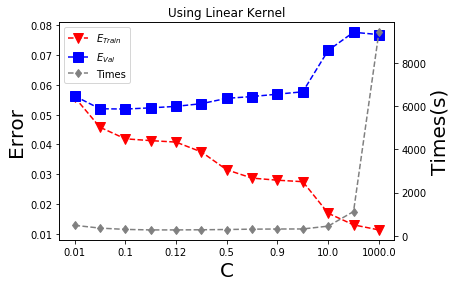

In [17]:
import matplotlib.pyplot as plt
#Vẽ đồ thị biểu diễn bảng kết quả
ET1 = [0.0559, 0.0458, 0.0419, 0.0413, 0.0408, 0.0375, 0.0315, 0.0287, 0.028, 0.0275, 0.0169, 0.013, 0.0113]
EV1 = [0.0563, 0.052, 0.0519, 0.0523, 0.0528, 0.0537, 0.0555, 0.0561, 0.0569, 0.0577, 0.0716, 0.0777, 0.0769]
ar = np.array([488, 359, 299, 275, 275, 282, 294, 310, 317, 319, 450, 1126, 9426])
xlabelsinC = np.array([0, 0.01, 0.1, 0.12, 0.5, 0.9, 10, 1000])
X = np.array(ET1)
Y = np.array(EV1)
fig, ax = plt.subplots()
plt.title('Using Linear Kernel')
l1 = ax.plot(X,'v--', color = 'r', label = r'$E_{Train}$', markersize = 10)
l2 = ax.plot(Y,'s--', color = 'b', label = r'$E_{Val}$', markersize = 10)
ax2 = ax.twinx()
l3 = ax2.plot(ar, 'd--', color = 'grey', label = 'Times')
lt = l1 + l2 + l3
labs = [l.get_label() for l in lt]
ax.legend(lt, labs, loc=0)
ax.set_xlabel('C', fontsize = 20)
ax.set_ylabel('Error', fontsize = 20)
ax.set_xticklabels(xlabelsinC)
ax2.set_ylabel('Times(s)', fontsize = 20)
plt.show()

**RBF Kernel**

**Bảng kết quả thu được**

| C | $\gamma$ |$E_{Train}$ | $E_{Val}$ | Times |
| --- | --- | --- | --- | --- |
| 0.1 | 0.001 | 0.09824 | 0.0861 | 26min 5s|
| 0.1 | 0.01 | 0.04702 | 0.0422 | 12min 19s |
| 0.1 | 0.1 | 0.28952 | 0.3125 | 1h 10min 35s |
| 1 | 0.001 | 6.422e-02 | 0.0589 | 10min 5s |
| 1 | 0.01 | 1.526e-02 | 0.0223 | 6min 9s |
| 1 | 0.1 | 4.000e-05 | 0.448 | 2h 4min 42s |
| 2 | 0.01 | 0.00788 | 0.0188 | 6min 1s |
| 3 | 0.01 | 0.00476 | 0.0182 | 5min 47s |
| 4 | 0.01 | 0.0029	| 0.0174 | 4min 35s |
| 5	| 0.01 | 0.00182 | 0.0172 | 4min 33s |
| 6	| 0.01 | 0.00128 | 0.017 | 4min 33s |
| 7	| 0.01 | 0.00108 | 0.0173 | 4min 42s |
| 8	| 0.01 | 0.00086 | 0.0171 | 4min 37s |
| 9	| 0.01 | 0.00074 | 0.0168 | 4min 30s |
| 10 | 0.001 | 0.03794 | 0.0408 | 5min 29s |
| 10 | 0.01 | 0.00058 | 0.0165 | 4min 48s |
| 10 | 0.1 | 0 | 0.0434 | 1h 54min 7s |


In [14]:
#Chay voi tap test
SVC_RBFKernel(train_X, train_Y, test_X, test_Y, c = 10, gamma = 0.01, max_iter = -1)

Wall time: 4min 44s
Training score:  0.99942
Validation score:  0.982


(0.0005800000000000249, 0.018000000000000016)

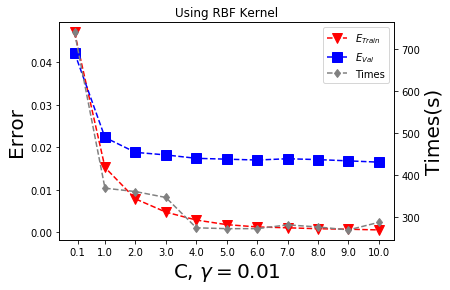

In [19]:
#Vẽ đồ thị biểu diễn bảng kết quả
lsET = [0.04702, 0.01526, 0.00788, 0.00476, 0.0029, 0.00182, 0.00128, 0.00108, 0.00086, 0.00074, 0.00058]
lsEV = [0.0422, 0.0223, 0.0188, 0.0182, 0.0174, 0.0172, 0.017, 0.0173, 0.0171, 0.0168, 0.0165]
Ga = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
ar = np.array([739, 369, 361, 347, 275, 273, 273, 282, 277, 270, 288])
xlabelsinC = np.array([0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
X = np.array(lsET)
Y = np.array(lsEV)
fig, ax = plt.subplots()
plt.title('Using RBF Kernel')
l1 = ax.plot(X,'v--', color = 'r', label = r'$E_{Train}$', markersize = 10)
l2 = ax.plot(Y,'s--', color = 'b', label = r'$E_{Val}$', markersize = 10)
ax2 = ax.twinx()
l3 = ax2.plot(ar, 'd--', color = 'grey', label = 'Times')
lt = l1 + l2 + l3
labs = [l.get_label() for l in lt]
ax.legend(lt, labs, loc=0)
ax.set_xlabel('C, $\gamma = 0.01$', fontsize = 20)
ax.set_ylabel('Error', fontsize = 20)
ax.set_xticks(xlabelsinC)
ax2.set_ylabel('Times(s)', fontsize = 20)
plt.show()